In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar la carpeta 'src' al sys.path
import sys
import os

sys.path.append(os.path.abspath("../../src"))

# Ahora puedes importar utils
from utils import cargar_datos_pd
from utils import ver_resumen_nulos
from utils import limpiar_letras_de_numeros
from utils import obtener_filas_no_numericas
from utils import identificar_atipicos_IQR
from utils import ver_diccionario
from utils import imprimir_bigotes
from utils import obtener_filas_no_fechas

ruta_archivo = "../../data/house-prices.csv"
columna = 'nombre_columna'
titulo = 'titulo'
#Carganos el archivo. Se modifico manualmente el archivo para la limpieza.
# Carga los datos del archivo CSV utilizando Pandas.
df = pd.read_csv(ruta_archivo, sep=',',header=0)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Definir las columnas numéricas y categóricas
numeric_features = ['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
categorical_features = ['Brick', 'Neighborhood']

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Crear un Pipeline completo con regresión lineal
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())#Definimos el modelo de regresion lineal
])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop(columns=["Price"])  # Eliminar la columna objetivo
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el Pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse:.2f}')
print(f'R-cuadrado: {r2:.2f}')


Error Cuadrático Medio: 121020173.82
R-cuadrado: 0.81


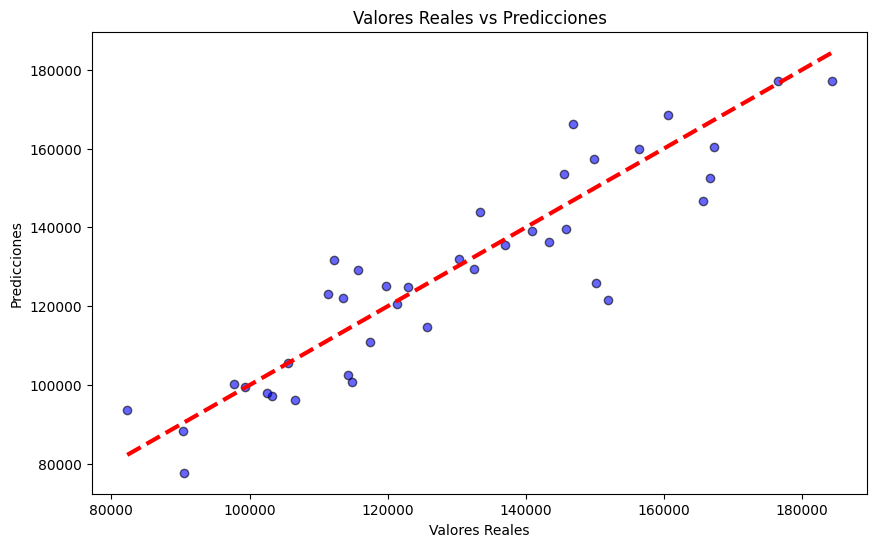

In [5]:
import matplotlib.pyplot as plt

# Realizar predicciones
y_pred = pipeline.predict(X_test)

# Graficar los valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()


In [7]:
df['Neighborhood'].unique()

array(['East', 'North', 'West'], dtype=object)

In [6]:
import pandas as pd

# Crear un DataFrame con las características de la casa a predecir
nueva_casa = pd.DataFrame({
    'Home': [0],            # ID ficticio, ya que no se usa en la predicción
    'SqFt': [2000],          # Tamaño en pies cuadrados
    'Bedrooms': [3],         # Número de habitaciones
    'Bathrooms': [2],        # Número de baños
    'Offers': [1],           # Número de ofertas
    'Brick': ["Yes"],        # Si es de ladrillo o no
    'Neighborhood': ["East"]  # Vecindario (ejemplo)
})

# Usar el pipeline entrenado para hacer la predicción
precio_predicho = pipeline.predict(nueva_casa)

print(f"El precio predicho para la casa es: ${precio_predicho[0]:.2f}")


El precio predicho para la casa es: $145940.17
